In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [105]:
X,y = datasets.make_classification(n_samples=100,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=2,random_state=1)
      

In [106]:
def calculate_centroid(data, K, U, m):
    Centroids = np.zeros((K, data.shape[1]))
    for i in range(K):
        Centroids[i, :] = np.sum((U[:, i]**m)[:, np.newaxis] * data, axis=0) / np.sum(U[:, i]**m)
    return Centroids
def calculate_membership (data, Centroids, K , m):
    U_new=np.zeros((data.shape[0],K))
    for i in range (K):
        U_new[:,i]=np.linalg.norm(data-Centroids[i,:]+1e-6,axis=1)

    U_new=   1/(U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new    

In [107]:
def fcm(K,m,data,U):
    Centroids=calculate_centroid(data, K, U , m)
    U_new= calculate_membership (data,Centroids, K , m )
    return U_new,Centroids

In [108]:
W = np.identity(X.shape[1])
K=2
m=1.25
data = X
l=[]
#Normailizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data = sc.fit_transform(data)
   

In [109]:
lst=[]
for epochs in range(50):
    U=np.random.rand(data.shape[0],K)
    U/=np.sum(U, axis=1)[:,np.newaxis]
    max_iteration=50
    data_ = np.copy(data)
    for i in range(0,data.shape[1]):
        data_[:,i] = data_[:,i]*W[i,i] 
    for iteration in range (max_iteration):
        U_new,Centroids = fcm(K,m,data_,U)
        if np.linalg.norm (U_new- U)<=0.00001:
            break
        U=U_new
        labels=np.argmax(U_new, axis=1)
        
    
    l.append(labels)
    s=0
    for i in range(K):
        for j in range(data.shape[0]):
            s = (s+(U[j,i]**2))
    s=(1/data.shape[0])*s
    for i in range(0,data.shape[1]):
            W[i,i] = W[i,i] + np.random.normal(0,(1-s)**0.5)
    lst.append(np.copy(W))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


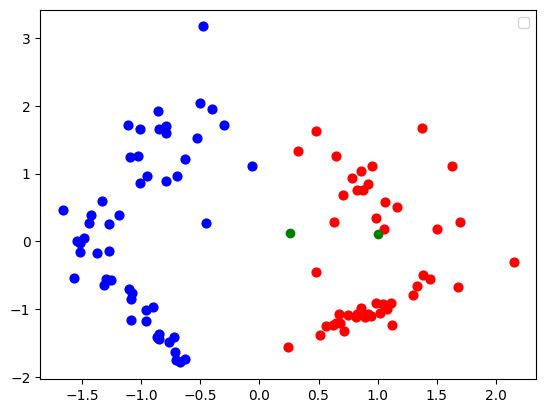

In [110]:
cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(l[0]):
    ix = np.where(l[0] == g)
    ax.scatter(X[ix,0], X[ix,1], c = cdict[g],s = 40)
ax.scatter(Centroids[0,0],Centroids[0,1],c='green')
ax.scatter(Centroids[1,0],Centroids[1,1],c='green')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


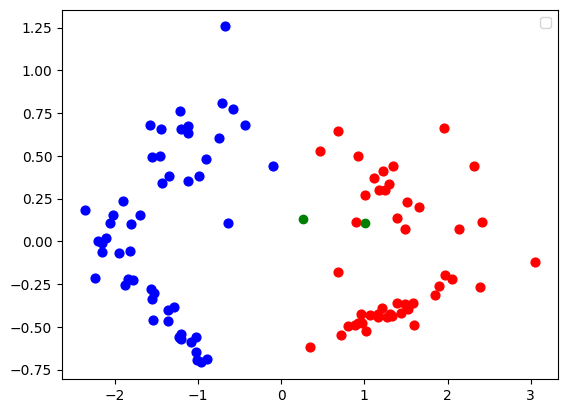

In [111]:
cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots()
for g in np.unique(l[0]):
    ix = np.where(l[0] == g)
    ax.scatter(X[ix,0]*W[0,0], X[ix,1]*W[1,1], c = cdict[g],s = 40)
ax.scatter(Centroids[0,0],Centroids[0,1],c='green')
ax.scatter(Centroids[1,0],Centroids[1,1],c='green')
ax.legend()
plt.show()

In [112]:
Centroids

array([[1.00350471, 0.10454874],
       [0.26162952, 0.13040423]])

In [114]:
W

array([[1.42144812, 0.        ],
       [0.        , 0.3957622 ]])

In [113]:
U_new

array([[9.99999669e-01, 3.31227981e-07],
       [9.99997398e-01, 2.60195640e-06],
       [4.87895689e-07, 9.99999512e-01],
       [5.70975039e-06, 9.99994290e-01],
       [9.24890326e-08, 9.99999908e-01],
       [9.99999672e-01, 3.27543377e-07],
       [9.99999967e-01, 3.33470236e-08],
       [9.99969315e-01, 3.06850585e-05],
       [4.67447594e-09, 9.99999995e-01],
       [2.69310909e-01, 7.30689091e-01],
       [3.99073513e-07, 9.99999601e-01],
       [1.77013367e-06, 9.99998230e-01],
       [9.99999941e-01, 5.89127138e-08],
       [5.11109987e-06, 9.99994889e-01],
       [1.67034040e-06, 9.99998330e-01],
       [9.99999879e-01, 1.21060752e-07],
       [3.86440070e-04, 9.99613560e-01],
       [9.99999002e-01, 9.98011888e-07],
       [1.16947490e-06, 9.99998831e-01],
       [4.92564959e-08, 9.99999951e-01],
       [1.04015511e-05, 9.99989598e-01],
       [1.79478971e-04, 9.99820521e-01],
       [1.04975643e-07, 9.99999895e-01],
       [9.99999996e-01, 3.50539915e-09],
       [5.817545